In [ ]:
import sys
sys.path.append('../file_loader')
from importlib import reload

from ecg_file_loader import ECGFileLoader
import ecg_file_loader

reload(ecg_file_loader)

import matplotlib.pyplot as plt
import numpy as np

#reload the py file to get the last changes

In [ ]:
loader = ECGFileLoader(use_s3 = False)
patient_data = loader.get_ecg_with_annotations('sub-035')

INFO:ecg_file_loader:Processing sub-035 run 01
INFO:ecg_file_loader:Processing sub-035 run 02
INFO:ecg_file_loader:Processing sub-035 run 03
INFO:ecg_file_loader:Processing sub-035 run 04
INFO:ecg_file_loader:Processing sub-035 run 05
INFO:ecg_file_loader:Processing sub-035 run 06
INFO:ecg_file_loader:Processing sub-035 run 07
INFO:ecg_file_loader:Processing sub-035 run 08
INFO:ecg_file_loader:Processing sub-035 run 09
INFO:ecg_file_loader:Processing sub-035 run 10
INFO:ecg_file_loader:Processing sub-035 run 11
INFO:ecg_file_loader:Processing sub-035 run 12
INFO:ecg_file_loader:Processing sub-035 run 13
INFO:ecg_file_loader:Processing sub-035 run 14


In [18]:
patient_data[2]

{'patient_id': 'sub-035',
 'run_number': '03',
 'ecg_file': 's3://seizury-data/ds005873/sub-035/ses-01/ecg/sub-035_ses-01_task-szMonitoring_run-03_ecg.edf',
 'eeg_file': 's3://seizury-data/ds005873/sub-035/ses-01/eeg/sub-035_ses-01_task-szMonitoring_run-03_eeg.edf',
 'annotation_file': 's3://seizury-data/ds005873/sub-035/ses-01/eeg/sub-035_ses-01_task-szMonitoring_run-03_events.tsv',
 'ecg_data': <RawEDF | tmplkl01h1p.edf, 1 x 9187072 (35887.0 s), ~70.1 MiB, data loaded>,
 'eeg_data': <RawEDF | tmpmnh930cq.edf, 2 x 9187072 (35887.0 s), ~140.2 MiB, data loaded>,
 'annotations':       onset  duration                eventType lateralization localization  \
 0   20397.0       5.0  sz_foc_a_m_hyperkinetic             un        front   
 1   23343.0      13.0  sz_foc_a_m_hyperkinetic             un        front   
 2   24019.0      21.0  sz_foc_a_m_hyperkinetic             un        front   
 3   30747.0      14.0  sz_foc_a_m_hyperkinetic             un        front   
 4   31486.0      14.0

In [9]:
def plot_ecg_with_seizures(ecg_raw, seizure_events):
    try:
        # Get ECG data (first channel if multiple)
        ecg_data = ecg_raw.get_data()[0]  # First channel
        times = ecg_raw.times
        
        plt.figure(figsize=(15, 6))
        plt.plot(times, ecg_data * 1e6, 'b-', linewidth=0.5, label='ECG')  # Convert to microvolts
        
        # Mark seizure events
        for i, event in enumerate(seizure_events):
            onset = event['onset_time']
            duration = event['duration']
            end_time = onset + duration
            
            # Highlight seizure period
            plt.axvspan(onset, end_time, alpha=0.3, color='red', 
                       label=f'Seizure {i+1}' if i == 0 else "")
            
            # Add text annotation
            plt.text(onset, plt.ylim()[1] * 0.9, f'S{i+1}', 
                    verticalalignment='top', fontsize=8, color='red')
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('ECG (μV)')
        plt.title('ECG Signal with Seizure Annotations')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting: {e}")


/var/folders/x6/3ljkq6l9301fxqkpg3n51z5h0000gn/T/ipykernel_3182/2185680927.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/pietrosaveri/Desktop/Pietro/•StartUps/Seizury/• src_blocks/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


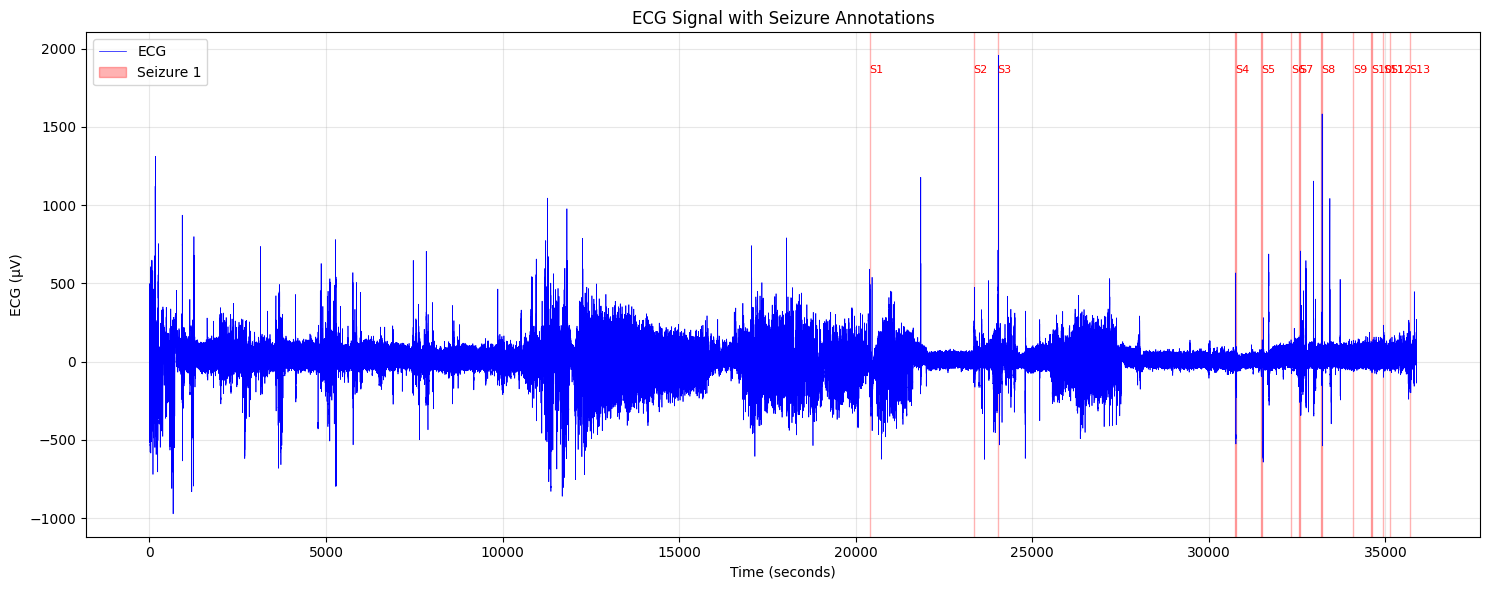

In [10]:
plot_ecg_with_seizures(
    patient_data[2]['ecg_data'],
    patient_data[2]['seizure_events']
)